In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [68]:
df = pd.read_csv('../Data/Credit.csv')

In [69]:
selected_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "PAYMENTS"]
df_selected = df[selected_features] 

In [70]:
df_selected.isna().sum()

BALANCE         0
PURCHASES       0
CASH_ADVANCE    0
PAYMENTS        0
dtype: int64

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

In [73]:
from sklearn.cluster import KMeans

In [74]:
best_score = -1
best_k = 0
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    lables = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, lables)
    print(f'K-{i}, Silhoutte score: {score:.3f}')

    if score > best_score:
        best_score = score
        best_k = i

K-2, Silhoutte score: 0.625
K-3, Silhoutte score: 0.599
K-4, Silhoutte score: 0.545
K-5, Silhoutte score: 0.554
K-6, Silhoutte score: 0.554
K-7, Silhoutte score: 0.416
K-8, Silhoutte score: 0.423
K-9, Silhoutte score: 0.355
K-10, Silhoutte score: 0.361


In [75]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [76]:
df['Cluster'].value_counts()

Cluster
1    7737
0    1213
Name: count, dtype: int64

## DBSCAN In Action!

In [77]:
eps_value = 0.5
min_samples_value = 8 

In [78]:
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

In [79]:
df['Cluster_2'] = labels

In [80]:
df['Cluster_2'].value_counts()

Cluster_2
 0    8252
-1     678
 1       9
 2       6
 3       5
Name: count, dtype: int64

In [81]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [82]:
if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)

In [83]:
score

np.float64(0.4329131947941418)

### Hyperparameter

In [84]:
best_score = -1
best_params = None

In [85]:
eps_values = np.arange(0.3, 1.5, 0.1)
min_samples_values = np.arange(2, 10)

max_iter = 50
count = 0

In [86]:
for eps in eps_values:
    for min_samples in min_samples_values:
        # if count >= max_iter:
        #     break

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
            
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

        # count += 1

In [87]:
print(f'Sil Score: {best_score:.4f}, Eps: {best_params[0]}, Min Samples: {best_params[1]}')

Sil Score: 0.8032, Eps: 1.2000000000000002, Min Samples: 5


In [88]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster_Optimal'] = labels

In [89]:
df['DBSCAN_Cluster_Optimal'].value_counts()

DBSCAN_Cluster_Optimal
 0    8828
-1     117
 1       5
Name: count, dtype: int64

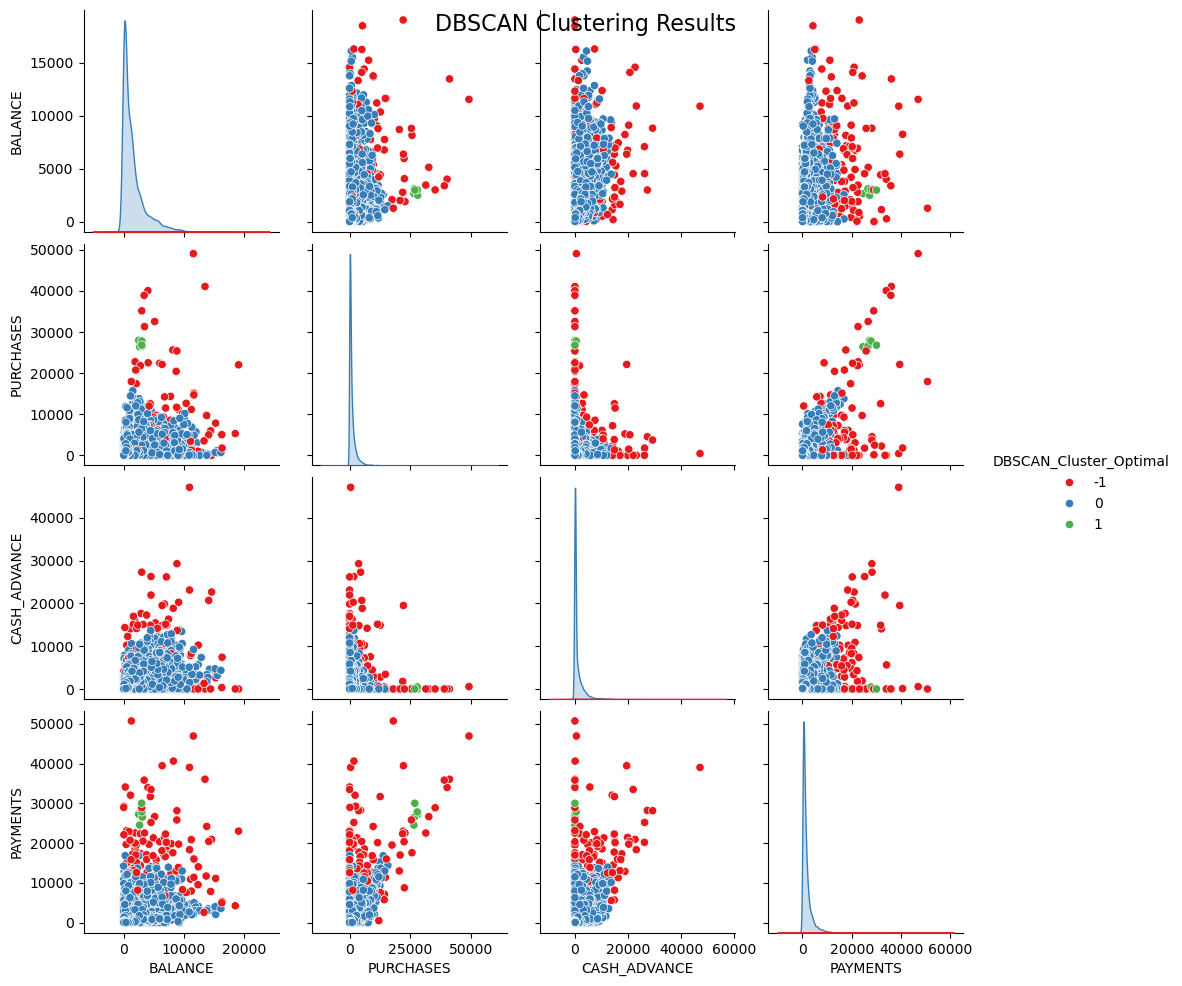

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[selected_features + ['DBSCAN_Cluster_Optimal']],
             vars=selected_features, hue='DBSCAN_Cluster_Optimal',
             palette='Set1', diag_kind='kde')
plt.suptitle('DBSCAN Clustering Results', fontsize=16)
plt.show()

## PCA for kmean cluster

In [125]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

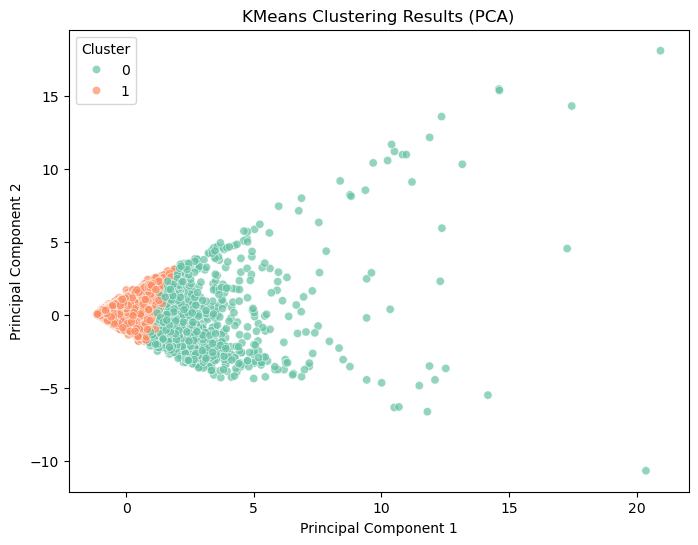

In [127]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# pca1, pca2
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2', alpha=0.7)
plt.title('KMeans Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


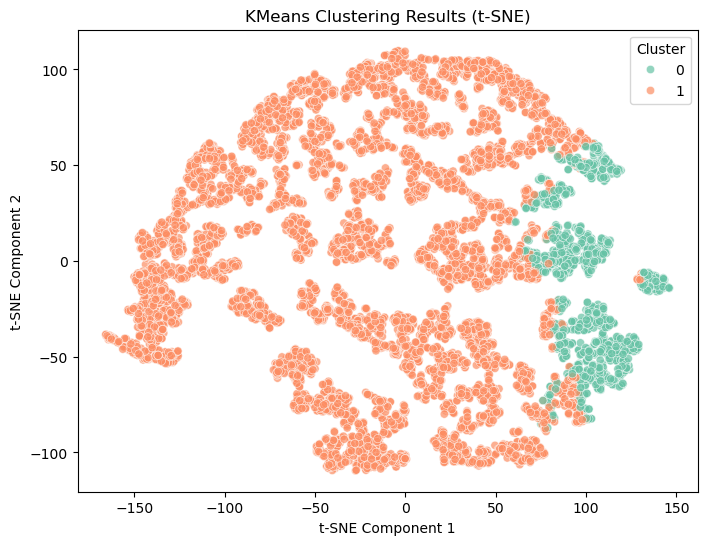

In [129]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=10000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Cluster'], palette='Set2', alpha=0.7)
plt.title('KMeans Clustering Results (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

In [120]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [121]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCAN_Cluster_Optimal,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,1


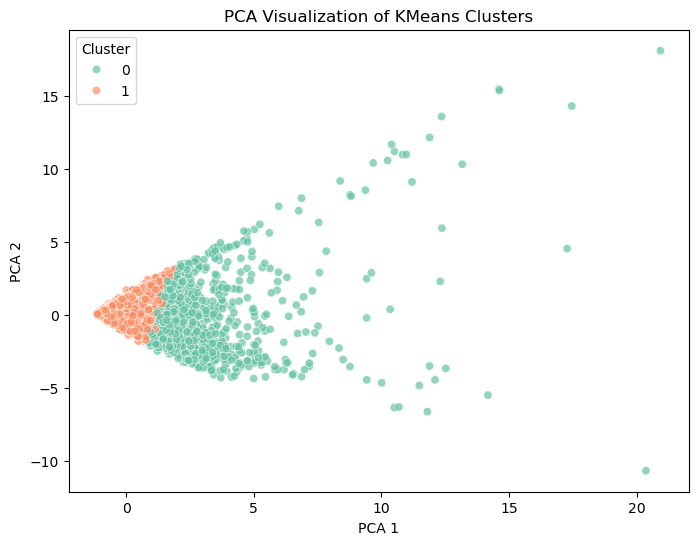

In [122]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA 2D for KMeans clustering visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df['Cluster'],
    palette="Set2",
    alpha=0.7
)
plt.title("PCA Visualization of KMeans Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


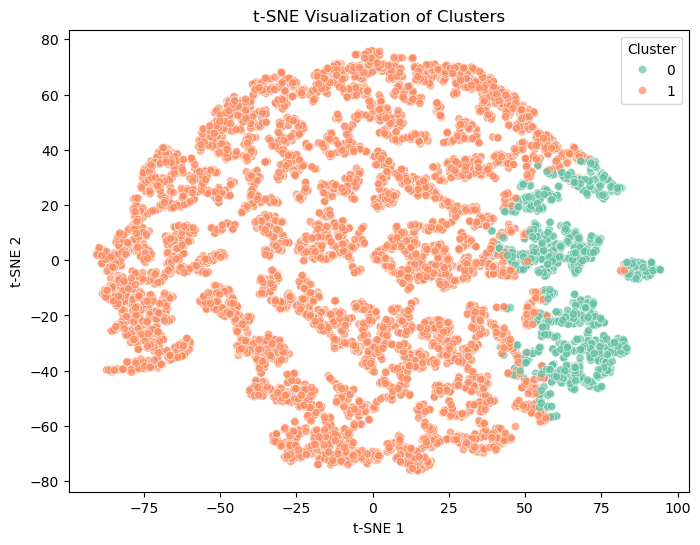

In [123]:
from sklearn.manifold import TSNE
# t-SNE 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df["Cluster"], palette="Set2", alpha=0.7)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.show()

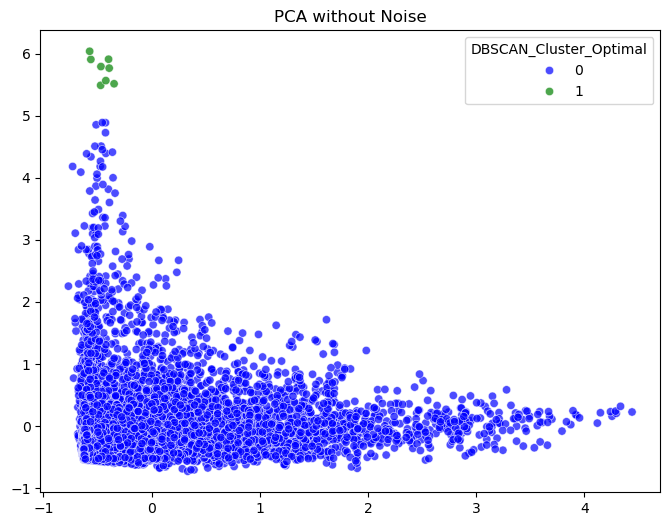

/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


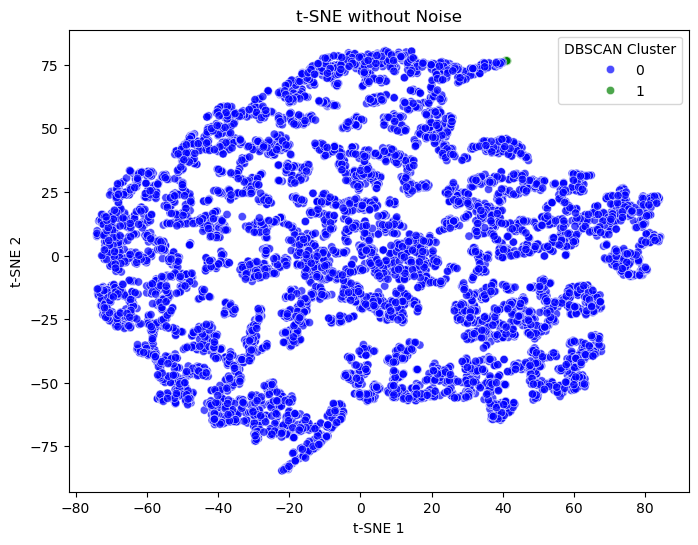

In [124]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

mask = df["DBSCAN_Cluster_Optimal"] != -1  # Buang noise

X_pca_no_noise = PCA(n_components=2, random_state=42).fit_transform(X_scaled[mask])
palette_no_noise = {0: "blue", 1: "green"}

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_no_noise[:,0], y=X_pca_no_noise[:,1],
                hue=df.loc[mask, "DBSCAN_Cluster_Optimal"],
                palette=palette_no_noise, alpha=0.7)
plt.title("PCA without Noise")
plt.show()
plt.show()


mask = df["DBSCAN_Cluster_Optimal"] != -1  # Buang noise
X_tsne_no_noise = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000).fit_transform(X_scaled[mask])
palette_no_noise = {0: "blue", 1: "green"}

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne_no_noise[:,0], y=X_tsne_no_noise[:,1],
                hue=df.loc[mask, "DBSCAN_Cluster_Optimal"],
                palette=palette_no_noise, alpha=0.7)
plt.title("t-SNE without Noise")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="DBSCAN Cluster")
plt.show()

In [91]:
df = pd.read_csv('../Data/Credit.csv')

In [92]:
selected_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "PAYMENTS"]
df_selected = df[selected_features] # kupilih 4 karena =.= kebanyakan kalo make semua

In [93]:
df_selected

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS
0,40.900749,95.40,0.000000,201.802084
1,3202.467416,0.00,6442.945483,4103.032597
2,2495.148862,773.17,0.000000,622.066742
3,1666.670542,1499.00,205.788017,0.000000
4,817.714335,16.00,0.000000,678.334763
...,...,...,...,...
8945,28.493517,291.12,0.000000,325.594462
8946,19.183215,300.00,0.000000,275.861322
8947,23.398673,144.40,0.000000,81.270775
8948,13.457564,0.00,36.558778,52.549959


In [94]:
df_selected = df_selected.fillna(df_selected.median())

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

In [97]:
print(pd.DataFrame(X_scaled).isna().sum().sum())

0


In [98]:
from sklearn.cluster import KMeans

In [99]:
best_score = -1
best_k = 0
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Cluster {k} = Silhouette Score = {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

Cluster 2 = Silhouette Score = 0.6264
Cluster 3 = Silhouette Score = 0.5727
Cluster 4 = Silhouette Score = 0.5484
Cluster 5 = Silhouette Score = 0.5571
Cluster 6 = Silhouette Score = 0.4323
Cluster 7 = Silhouette Score = 0.4154
Cluster 8 = Silhouette Score = 0.4218
Cluster 9 = Silhouette Score = 0.4366
Cluster 10 = Silhouette Score = 0.4284


In [100]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

In [101]:
eps_value = 0.5
min_samples_value = 8 # umumnya dipakai 2 x jumlah fitur

In [102]:
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

In [103]:
print(np.unique(labels))

[-1  0  1  2  3]


In [104]:
n_clusters_2d = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_2d = list(labels).count(-1)

In [105]:
print(f'\nEstimasi jumlah cluster: {n_clusters_2d}')
print(f'Estimasi jumlah noise points: {n_noise_2d}')


Estimasi jumlah cluster: 4
Estimasi jumlah noise points: 678


In [106]:
if n_clusters_2d > 1:
    score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {score:.3f}')
else:
    print('Silhouette Score tidak dapat dihitung karena hanya ditemukan 1 cluster atau kurang.')


Silhouette Score: 0.433


In [107]:
eps_values = np.arange(0.3, 1.5, 0.1)       # Coba nilai eps dari 0.3 sampai 1.4
min_samples_values = range(3, 10)           # Min samples dari 3 sampai 9

max_iter = 50   # Maksimal iterasi untuk grid search. Sebenernya, kalo mo GA make ini gpp. cuman, jadinya 300 an iterasi
count = 0

In [108]:
best_score = -1
best_params = None

In [109]:
for eps in eps_values:
    for min_samples in min_samples_values:
        if count >= max_iter:
            break
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        
        if n_clusters > 1:
            mask = labels != -1
            score = silhouette_score(X_scaled[mask], labels[mask])

            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
        count += 1

In [110]:
f"Best DBSCAN Silhouette Score: {best_score:.4f} dengan eps={best_params[0]} dan min_samples={best_params[1]}"

'Best DBSCAN Silhouette Score: 0.7729 dengan eps=0.4 dan min_samples=8'

In [111]:
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
df["DBSCAN_Cluster_Optimal"] = dbscan.fit_predict(X_scaled)
print("Distribusi cluster DBSCAN optimal:")
df["DBSCAN_Cluster_Optimal"].value_counts()

Distribusi cluster DBSCAN optimal:


DBSCAN_Cluster_Optimal
 0    8028
-1     914
 1       8
Name: count, dtype: int64

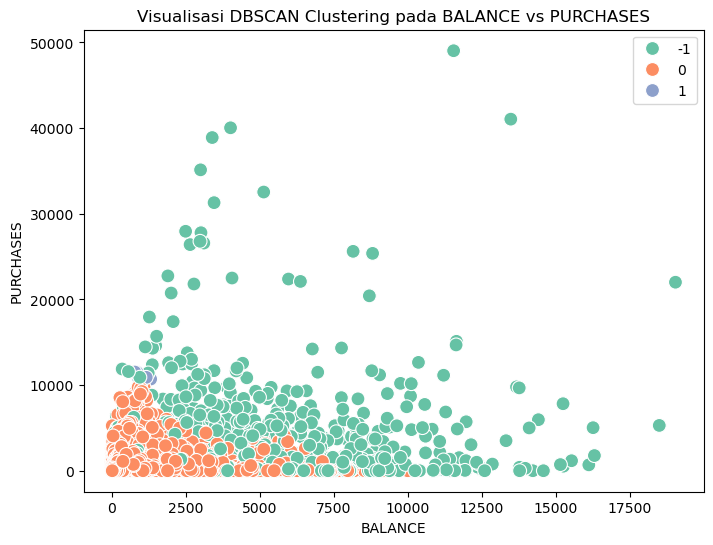

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df.copy()
df_plot["Cluster"] = df["DBSCAN_Cluster_Optimal"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="BALANCE",
    y="PURCHASES",
    hue="Cluster",
    palette="Set2",
    s=100
)
plt.title("Visualisasi DBSCAN Clustering pada BALANCE vs PURCHASES")
plt.legend()
plt.show()

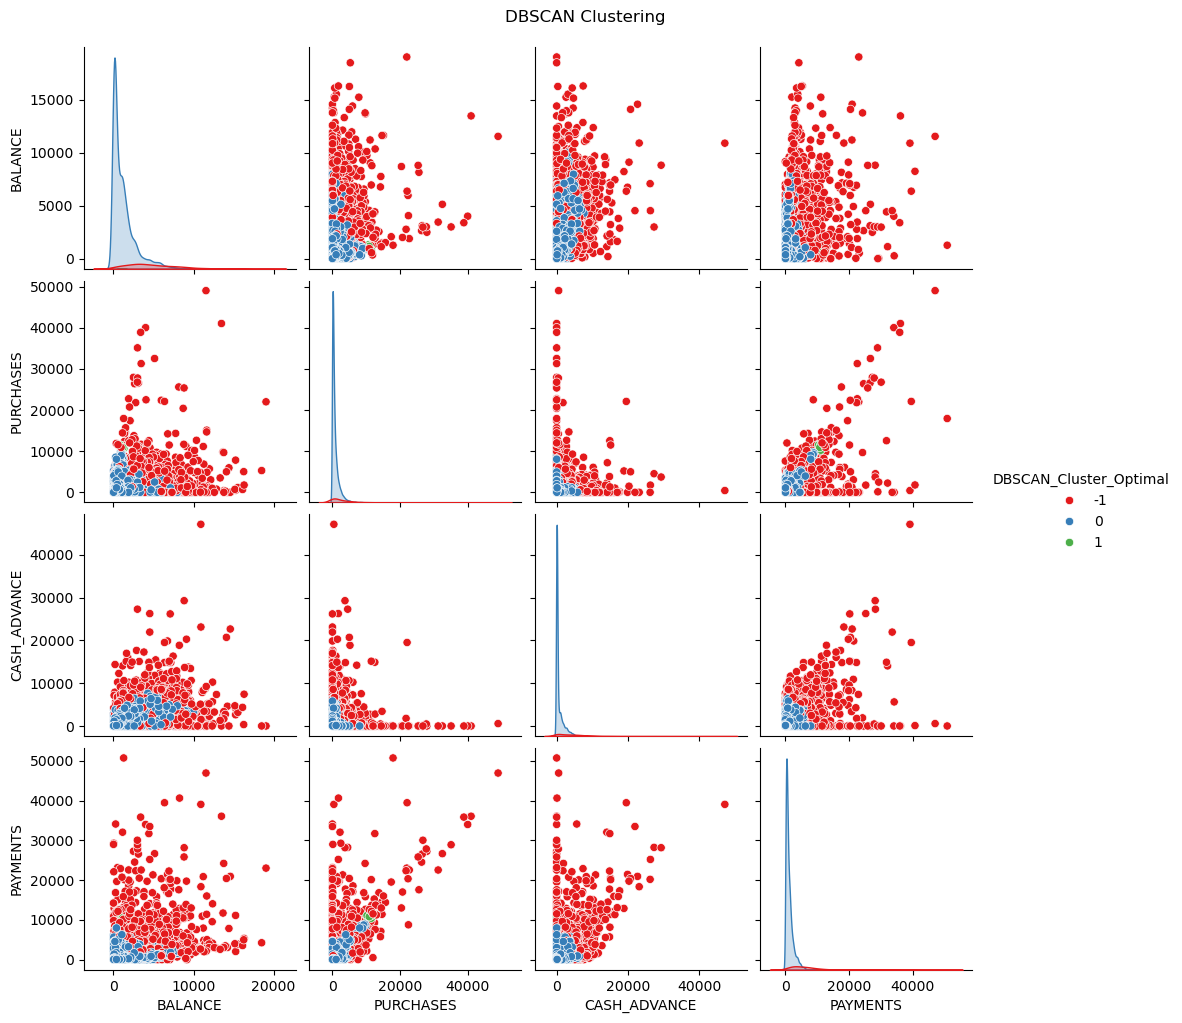

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[selected_features + ["DBSCAN_Cluster_Optimal"]],
             vars=selected_features, hue="DBSCAN_Cluster_Optimal",
             palette="Set1", diag_kind="kde")
plt.suptitle("DBSCAN Clustering", y=1.02)
plt.show()